# Tutorial for Roundtrip

In this introductory tutorial, we go through the different steps of a Roundtrip workflow.

Users can use Roundtrip by **Python API** or a **single command line** after installation.

First of all, you need to install Roundtrip. The recommended way is to use **pip install pyroundtrip**.



## Use Roundtrip Python API

In [1]:
import pyroundtrip as pyrt
print("Currently use version v%s of Roundtrip."%pyrt.__version__)

Currently use version v2.0.1 of Roundtrip.


### Configuring a Roundtrip model

Before creating a Roundtrip model, a python `dict` object should be created for depoying the hyperparameters for a Roundtrip model, which include the standard deviation (sigma), dimensions for latent features, neural network architecture, etc.

The detailed hyperparameters are described as follows.


Config Parameters | Description
:-:|:-:
output_dir       | Output directory to save the results during the model training. *Default: "."*
dataset       | Dataset name for indicating the input data. *Default: "Mydata"*
z_dim  | Dimension of the latent space. *Default: 5*
x_dim | Dimension of the data space.
sd_x |  Standard deviation for forward mapping (Gaussian assumption). *Default: 0.05*
scale | Scale parameter for the student's t-distribution in importance sampling. *Default: 0.5*
sample_size | Sample size for importance sampling. *Default: 20000*
lr | Learning rate. *Default: 0.0002*
g_units | Number of units for decoder/generator network G. *Default: [512,512,512,512,512,512,512,512,512,512]*.
e_units | Number of units for encoder network E. *Default: [256,256,256,256,256,256,256,256,256,256]*.
dz_units | Number of units for discriminator network in latent space. *Default: [128,128]*.
dx_units | Number of units for discriminator network in data space. *Default: [256,256,256,256]*.
alpha| Coefficient for reconstruction loss. *Default: 10*.
beta| Coefficient for roundtrip loss. *Default: 1*.
gamma| Coefficient for gradient penalty loss. *Default: 0*.
g_d_freq| Frequency for updating discriminators and generators. *Default: 1*.
save_model| Whether to save the model wegihts. *Default: False*.

<div class="alert alert-info">
<b>Tips</b>

Config parameters are necessary for creating a Roundtrip model. Here are some tips for configuring parameters.
    
1) **sd_x**, **scale** have a noticeable impact on the performance, please refer to *src/configs* for guidance. 
    
2) **z_dim** should be relatively much smaller than **x_dim**, which satisties the manifold assumption in Roundtrip.
</div>

### Examples for loading config parameters 

We provide many templates of the hyperparameters in `[path_to_Roundtrip]/src/configs` [folder](https://github.com/kimmo1019/Roundtrip/tree/master/src/configs) for different datasets/settings.

Users can use `yaml` to load the hyperparameters as a python `dict` object easily.


In [2]:
import yaml
params = yaml.safe_load(open('configs/config_involute.yaml', 'r'))
print(params)

{'dataset': 'involute', 'output_dir': '.', 'x_dim': 2, 'z_dim': 2, 'lr': 0.0002, 'alpha': 10, 'beta': 1, 'gamma': 0, 'g_d_freq': 1, 'g_units': [512, 512, 512, 512, 512, 512, 512, 512, 512, 512], 'e_units': [256, 256, 256, 256, 256, 256, 256, 256, 256, 256], 'dz_units': [128, 128], 'dx_units': [256, 256, 256, 256], 'save_model': False, 'sd_x': 0.4, 'scale': 0.5, 'sample_size': 20000}


### Initilizing a Roundtrip model

It is super easy to create a Roundtrip model when the hyperparameters (`params`) are prepared.

`timestamp` should set to be *None* if you want to train a model from scratch rather than loading a pretrained model.

`random_seed` denotes the random seed used for reproducing the results.

In [3]:
model = pyrt.Roundtrip(params=params,random_seed=123)

### Data preparation  

Before training a Roundtrip model, we need to provide the data with size `(nb_samples, nb_feats)` to the model. The input data can be a two-dimensional array from a `numpy.array` object or a file object (`npy`,`csv`, or `txt`).


<div class="alert alert-info">
<b>Tips</b>

There are three different ways to feed the training data to a Roundtrip model.
    
1) Loading data from a python *numpy.array*.
    
2) Loading data from a csv, txt, or npy file.

</div>

In [6]:
#get the data from the Involute simulation dataset for an example.
xs = pyrt.Swiss_roll_sampler(N=20000)
data = xs.X_train
print('The training data contains %d instances with %d feats'%(data.shape))

The training data contains 16200 instances with 2 feats


### Run Roundtrip model training

Once data is ready, Roundtrip can be trained using built-in `.train` method with the following parameters

Training parameters | Description
:-:|:-:
data | Object containing the training data. *Default: None*.
data_file | Str object denoting the path to the input file (csv, txt, npz). *Default: None*.
sep | Str object denoting the delimiter for the input file. *Default: \t*.
header | Int object denoting row number(s) to use as the column names. *Default: 0*.
normalize | Bool object denoting whether apply standard normalization to the input. *Default: False*.
batch_size | Int object denoting the batch size in training. *Default: 32*.
n_iter | Int object denoting the training iterations. *Default: 30000*.
batches_per_eval | Int object denoting the number of iterations per evaluation. *Default: 500*.
batches_per_save | Int object denoting the number of iterations per save. *Default: 10000*.
startoff | Int object denoting the beginning iterations to jump without save and evaluation. *Defalt: 0*.
verbose | Bool object denoting whether showing the progress bar. *Default: True*.
save_format| Str object denoting the format (csv, txt, npy) to save the results. *Default: txt*.


In [7]:
model.train(data=data, save_format='npy', n_iter=40000, batches_per_eval=10000)

Iteration [0] : g_loss_adv [0.7563], e_loss_adv [0.7900],                l2_loss_x [5.4236], l2_loss_z [0.9010], g_e_loss [64.7923], dx_loss [0.4838], dz_loss [0.4194], d_loss [0.9032]
Iteration [10000] : g_loss_adv [0.2578], e_loss_adv [0.1664],                l2_loss_x [0.0224], l2_loss_z [0.0028], g_e_loss [0.6761], dx_loss [0.1620], dz_loss [0.1587], d_loss [0.3207]
Iteration [20000] : g_loss_adv [0.2210], e_loss_adv [0.1626],                l2_loss_x [0.0154], l2_loss_z [0.0043], g_e_loss [0.5804], dx_loss [0.1674], dz_loss [0.1694], d_loss [0.3368]
Iteration [30000] : g_loss_adv [0.1878], e_loss_adv [0.1556],                l2_loss_x [0.0096], l2_loss_z [0.0028], g_e_loss [0.4675], dx_loss [0.1674], dz_loss [0.1611], d_loss [0.3285]
Iteration [40000] : g_loss_adv [0.1658], e_loss_adv [0.1564],                l2_loss_x [0.0063], l2_loss_z [0.0012], g_e_loss [0.3971], dx_loss [0.1581], dz_loss [0.1614], d_loss [0.3196]


We train a Roundtrip for 100 iterations for illustration purpose, `n_iter` is recommended to be 40000.

The results are saved based on the `output_dir` parameter where `px_est_[iter_number].[format]` denotes estimated probabilities at different training iterations. For simple simulation datasets such as `involute` and `indep_gmm`, the density visulizations are also provided at `2d_grid_[method]_density_pre_at_[iter_number].png`.

`iter_number` denotes the training iteraction and `format` is determined by `save_format`, which can be `csv`,`txt`, or `npz`. `method` can be either `IS` or `CF` denoting importance sampling and Laplacian approximation, respectively.

Let's show the density map after training for `40000` iterations based on importance sampling and Laplacian approximation.

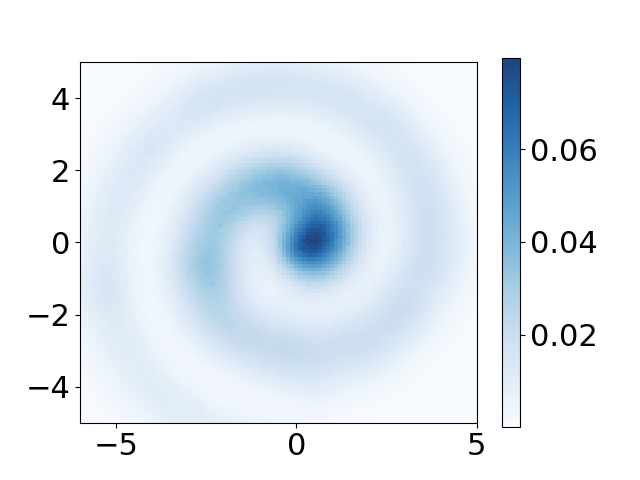

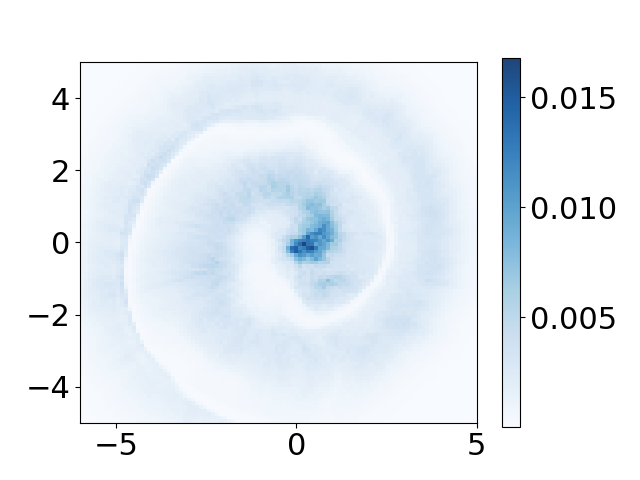

In [13]:
from IPython.display import Image, display

listOfImageNames = ['results/involute/20230413_142516/2d_grid_IS_density_pre_at_40000.png',
                    'results/involute/20230413_142516/2d_grid_CF_density_pre_at_40000.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

### Run Roundtrip density on external data after training

Once a Roundtrip model is trained, it could be applied to any external dataset to estimate the density.

In [14]:
from scipy.stats import pearsonr,spearmanr
px_est = model.estimate_px_with_IS(xs.X_test,
                                sd_x=params['sd_x'],
                                scale=params['scale'],
                                sample_size=params['sample_size'],log=False)
px_true = xs.get_density(xs.X_test)
print('Pearson correlation is %.3f, Spearman correlation is %.3f'%(pearsonr(px_est,px_true)[0],
        spearmanr(px_est,px_true)[0]))

Pearson correlation is 0.988, Spearman correlation is 0.972


## Use Roundtrip by a command-line interface (CLI)

When installing the Roundtrip by `pip`, setuptools will add the console script to PATH and make it available for general use. This has advantage of being generalizeable to non-python scripts! This CLI takes a text file as input.

In [15]:
!roundtrip -h

usage: roundtrip [-h] -output_dir OUTPUT_DIR -input INPUT [-dataset DATASET]
                 [--save-model | --no-save-model]
                 [--binary-treatment | --no-binary-treatment] -z_dim Z_DIM
                 [-lr LR] [-alpha ALPHA] [-beta BETA] [-gamma GAMMA]
                 [-g_d_freq G_D_FREQ] [-g_units G_UNITS [G_UNITS ...]]
                 [-e_units E_UNITS [E_UNITS ...]]
                 [-dz_units DZ_UNITS [DZ_UNITS ...]]
                 [-dx_units DX_UNITS [DX_UNITS ...]]
                 [-sample_size SAMPLE_SIZE] [-sd_x SD_X] [-scale SCALE]
                 [-batch_size BATCH_SIZE] [-n_iter N_ITER]
                 [-startoff STARTOFF] [-batches_per_eval BATCHES_PER_EVAL]
                 [-save_format SAVE_FORMAT] [--save_res | --no-save_res]
                 [-seed SEED]

Roundtrip: density estimation with deep generative neural networks - v2.0.0

optional arguments:
  -h, --help            show this help message and exit
  -output_dir OUTPUT_DIR
              

The parameters are consistent with the `Python APIs`. Here, we use a demo data for an example!

In [17]:
!roundtrip -input demo.npy -output_dir ./ -n_iter 100 -z_dim 2 -startoff 0 -batches_per_eval 50

2023-04-13 15:48:28.262192: W tensorflow/stream_executor/cuda/cuda_driver.cc:374] A non-primary context 0x5ea5390 for device 0 exists before initializing the StreamExecutor. The primary context is now 0. We haven't verified StreamExecutor works with that.
2023-04-13 15:48:28.262353: F tensorflow/core/platform/statusor.cc:33] Attempting to fetch value instead of handling error INTERNAL: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_DEVICE_UNAVAILABLE: CUDA-capable device(s) is/are busy or unavailable
